<a href="https://colab.research.google.com/github/Pluviophile-1/MMO_LAB/blob/main/MMO_lab2(xiu).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# 1.Импорт библиотеки и загрузка набора данных



Adult Income Набор данных: В этом наборе данных содержится информация о возрасте, типе работы, образовании, поле, этнической принадлежности, продолжительности рабочего времени и соответствующем уровне дохода (>$50K или <=$50K).В данном случае тип работы, образование, пол и раса - категориальные признаки, а возраст и количество отработанных часов - числовые признаки, и в наборе данных есть некоторые пропущенные значения.



In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# 在线数据集的 URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# 定义列名
column_names = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "gender",
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
]

# 加载数据集
data = pd.read_csv(url, header=None, names=column_names, na_values="?", skipinitialspace=True)

# 查看数据集的前几行
print("数据集的前5行：")
print(data.head())

# 查看数据集的基本信息
print("\n数据集的基本信息：")
data.info()

# 查看数据集的描述性统计信息
print("\n数据集的描述性统计信息：")
print(data.describe(include='all'))

数据集的前5行：
   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race  gender  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0    

# 2.Просмотр основной информации о наборе данных

Узнайте основную информацию о наборе данных, включая форму, первые несколько строк данных, описательную статистическую информацию и тип данных в каждом столбце.

In [20]:
# 创建数据副本用于对比
data_before = data.copy()


# 3.Устранение пробелов в данных

In [21]:
print("缺失值情况：")
print(data.isnull().sum())

# 处理缺失值
for column in data.columns:
    if data[column].dtype == 'object':  # 分类特征
        # 使用众数填充缺失值
        mode_value = data[column].mode()[0]
        data[column] = data[column].fillna(mode_value)
    else:  # 数值特征
        # 使用中位数填充缺失值
        median_value = data[column].median()
        data[column] = data[column].fillna(median_value)

print("处理后的缺失值情况：")
print(data.isnull().sum())

缺失值情况：
age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
gender               0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64
处理后的缺失值情况：
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


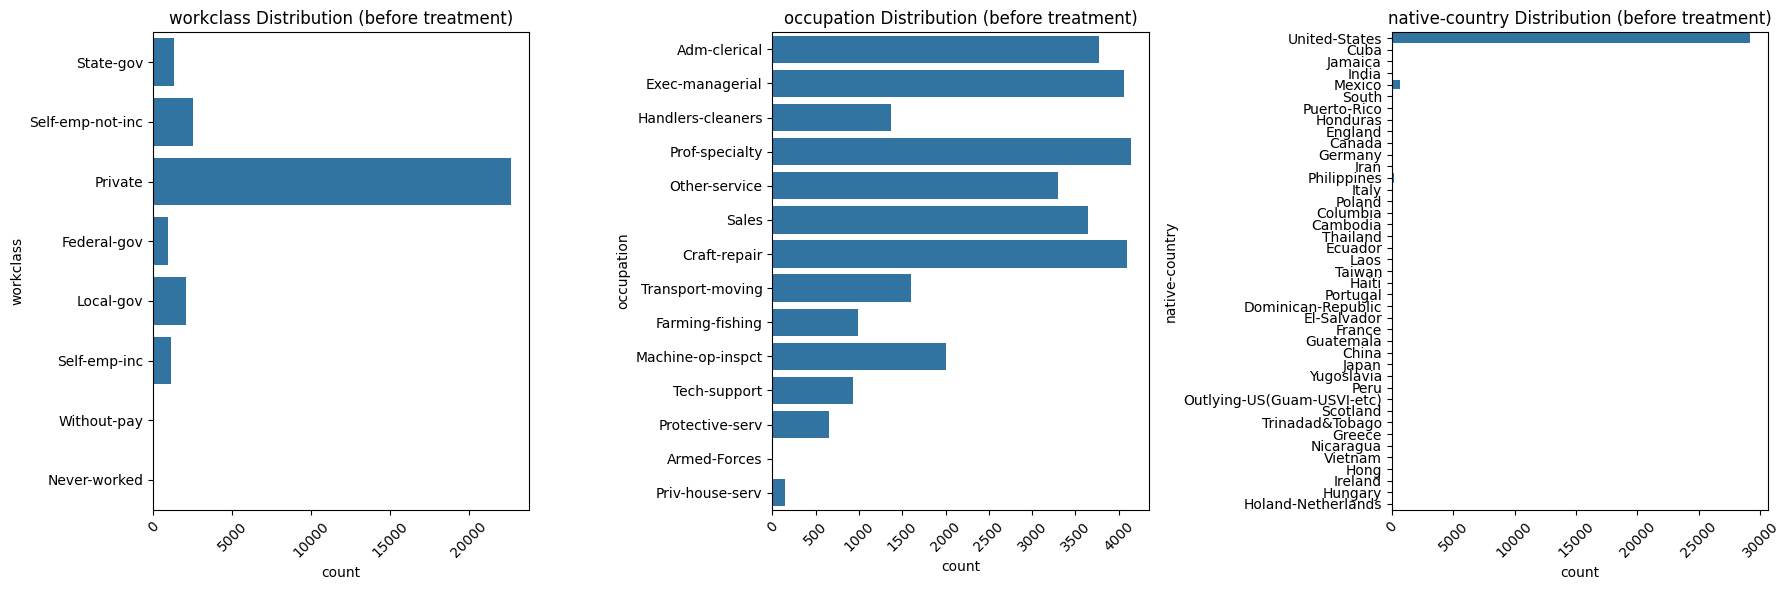

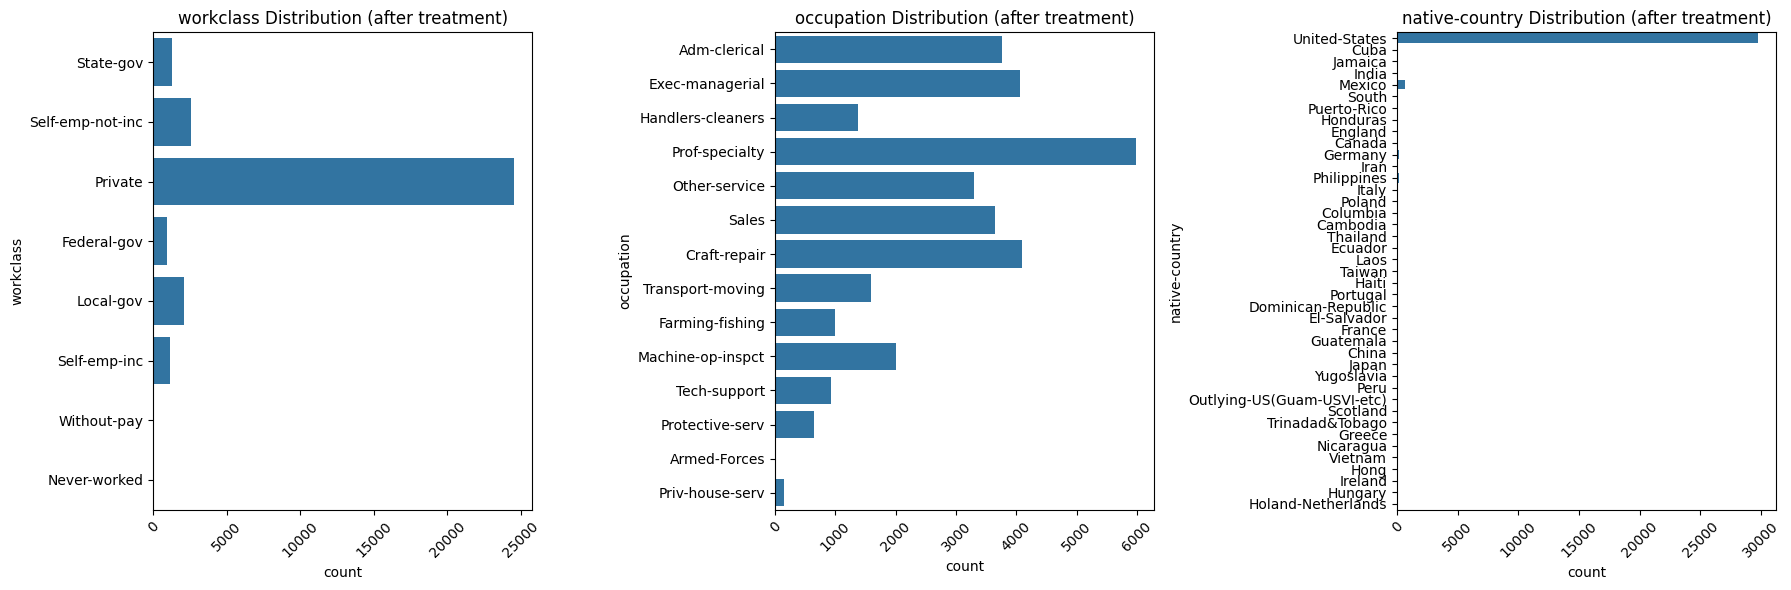

In [24]:
# 可视化分类特征分布（处理前）
plt.figure(figsize=(18, 6))
for i, column in enumerate(['workclass', 'occupation', 'native-country'], 1):
    plt.subplot(1, 3, i)
    sns.countplot(data_before[column])
    plt.title(f"{column} Distribution (before treatment)")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 可视化分类特征分布（处理后）
plt.figure(figsize=(18, 6))
for i, column in enumerate(['workclass', 'occupation', 'native-country'], 1):
    plt.subplot(1, 3, i)
    sns.countplot(data[column])
    plt.title(f"{column} Distribution (after treatment)")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4.Просмотр значений категориальных признаков в первом измерении, кодирование категориальных признаков

In [25]:
# 确定所有分类特征
categorical_columns = data.select_dtypes(include=['object']).columns

# 使用 pandas.get_dummies 进行 One-Hot 编码
data_encoded = pd.get_dummies(data, columns=categorical_columns)

# 查看编码后的数据集
print("编码后的数据集：")
print(data_encoded.head())

# 查看编码后的数据集信息
print("\n编码后的数据集信息：")
data_encoded.info()

编码后的数据集：
   age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

   workclass_Federal-gov  workclass_Local-gov  workclass_Never-worked  \
0                  False                False                   False   
1                  False                False                   False   
2                  False                False                   False   
3                  False                False                   False   
4                  False                False                   False   

   workclass_Private  ...  native-country_Scotland  native-country_South  \
0            

# 5.Нормализация числовых характеристик

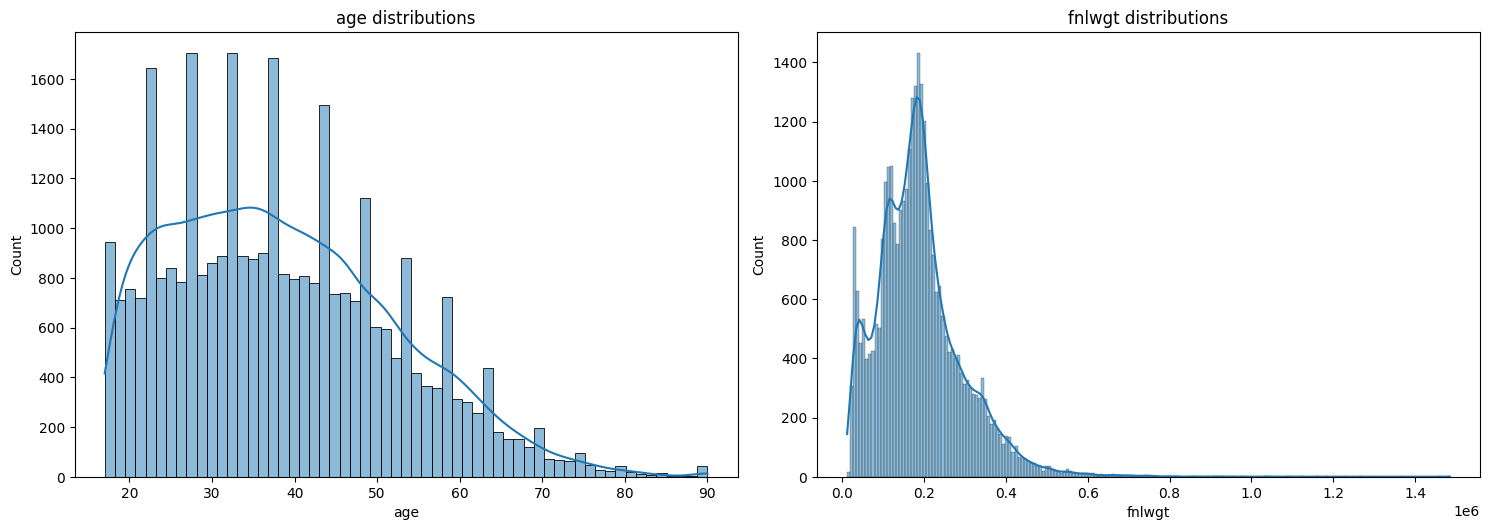

In [36]:
# 确定数值特征
numeric_columns = ['age', 'fnlwgt']

# 可视化数值特征分布
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 2, i)
    sns.histplot(data[column], kde=True)
    plt.title(f"{column} distributions")

plt.tight_layout()
plt.show()

<ipython-input-35-1607af762fe2>:21: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-35-1607af762fe2>:21: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-35-1607af762fe2>:21: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-35-1607af762fe2>:21: UserWarning: Glyph 21464 (\N{CJK UNIFIED IDEOGRAPH-53D8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-35-1607af762fe2>:21: UserWarning: Glyph 25442 (\N{CJK UNIFIED IDEOGRAPH-6362}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-35-1607af762fe2>:21: UserWarning: Glyph 21518 (\N{CJK UNIFIED IDEOGRAPH-540E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-35-1607af762fe2>:21: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing fro

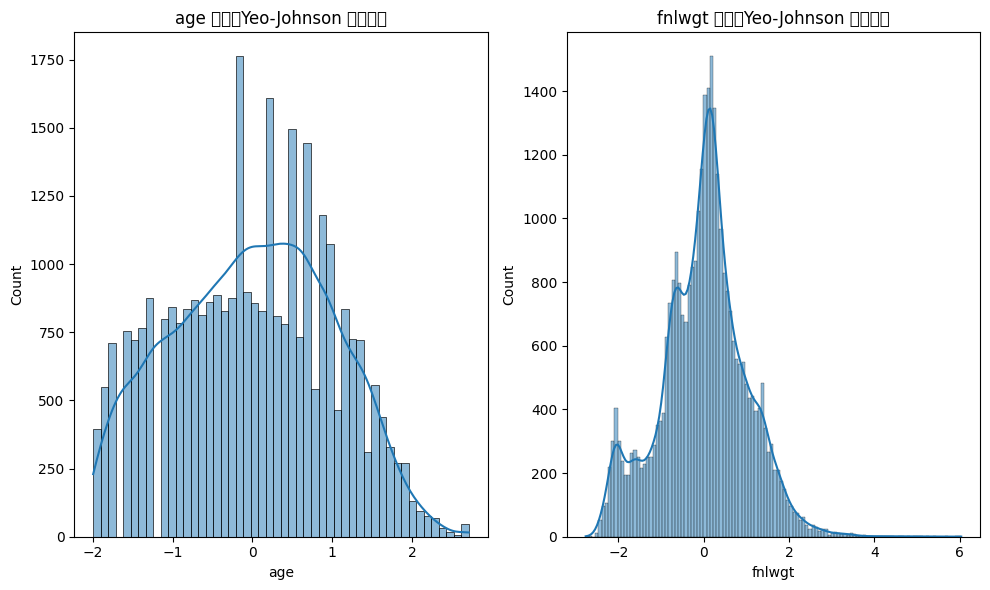

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
# 指定要变换的数值特征
numeric_columns = ['age', 'fnlwgt']

# 应用 Yeo-Johnson 变换
pt = PowerTransformer(method='yeo-johnson', standardize=True)
data_yeojohnson = data.copy()
data_yeojohnson[numeric_columns] = pt.fit_transform(data_yeojohnson[numeric_columns])

# 可视化数值特征分布（Yeo-Johnson 变换后）
plt.figure(figsize=(10, 6))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(1, 2, i)
    sns.histplot(data_yeojohnson[column], kde=True)
    plt.title(f"{column} Distribution (Yeo-Johnson transformed)")

plt.tight_layout()
plt.show()

# 6.Просмотр основной информации об обработанном наборе данных

In [ ]:
print("处理后的数据集基本信息：")
print("数据集形状：", data.shape)
print("数据集前5行：")
print(data.head())
print("数据集描述性统计信息：")
print(data.describe())

处理后的数据集基本信息：
数据集形状： (28855, 108)
数据集前5行：
        age    fnlwgt  educational-num  gender  capital-gain  capital-loss  \
0  0.109589  0.144430                7    Male      0.000000           0.0   
1  0.287671  0.051677                9    Male      0.000000           0.0   
2  0.150685  0.219011               12    Male      0.000000           0.0   
3  0.369863  0.099418               10    Male      0.076881           0.0   
4  0.013699  0.060942               10  Female      0.000000           0.0   

   hours-per-week income  workclass_?  workclass_Federal-gov  ...  \
0        0.397959  <=50K        False                  False  ...   
1        0.500000  <=50K        False                  False  ...   
2        0.397959   >50K        False                  False  ...   
3        0.397959   >50K        False                  False  ...   
4        0.295918  <=50K         True                  False  ...   

   native-country_Portugal  native-country_Puerto-Rico  \
0                